### Decision tree GridSearchCV Cross Validation
Name: Sameeksha Kini

Roll No: J029

In [1]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\samee\OneDrive\Documents\sem 5\ml


In [2]:
df = pd.read_csv("C:\\Users\\samee\\Downloads\\car_evaluation.csv", header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
for i in col_names:
    print(df[i].value_counts())

vhigh    432
med      432
high     432
low      432
Name: buying, dtype: int64
vhigh    432
med      432
high     432
low      432
Name: maint, dtype: int64
5more    432
2        432
3        432
4        432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [7]:
df.shape

(1728, 7)

In [8]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform((X_test))

In [11]:
## Gini index as criterion

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
y_pred = clf_gini.predict(X_test)

In [ ]:
## grid search cv

In [15]:
from sklearn.model_selection import GridSearchCV
option=['gini','entropy']
weight_option=['auto','sqrt','log2']
param_grid={'criterion':option, 'max_features':[2,3,4,5,6],'max_depth':[4,5,6,7],'min_samples_split':[2,3,4,5]}
grid=GridSearchCV(clf_gini, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9247311827956989
{'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_split': 2}


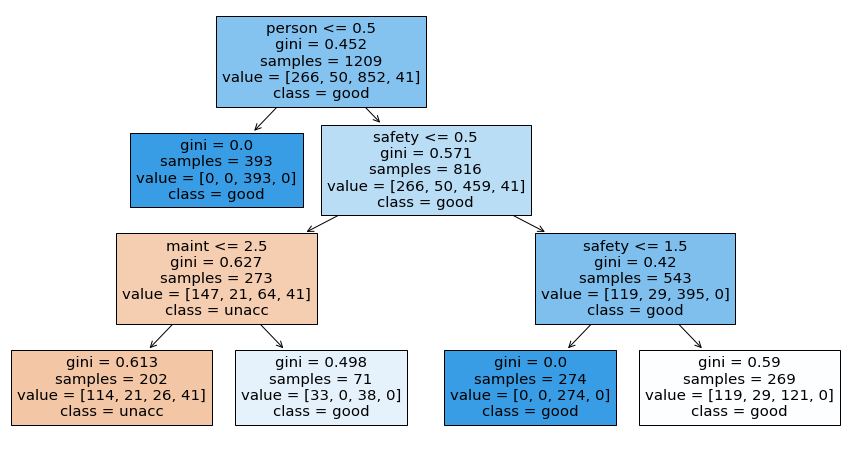

In [16]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf_gini, 
               feature_names=['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'], 
               class_names=list(set(y_train)), 
               filled=True)
plt.show()

In [17]:
# Checking for underfitting

print(f'Training set score: {clf_gini.score(X_train,y_train)}')
print(f'Test set score: {clf_gini.score(X_test,y_test)}')

Training set score: 0.7775020678246485
Test set score: 0.7572254335260116


In [18]:
## Post Grid search model

In [19]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7,max_features = 6)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=6)

In [20]:
y_pred = dtc.predict(X_test)

In [21]:
print(f'Training set score: {dtc.score(X_train,y_train)}')
print(f'Test set score: {dtc.score(X_test,y_test)}')

Training set score: 0.9330024813895782
Test set score: 0.9344894026974951


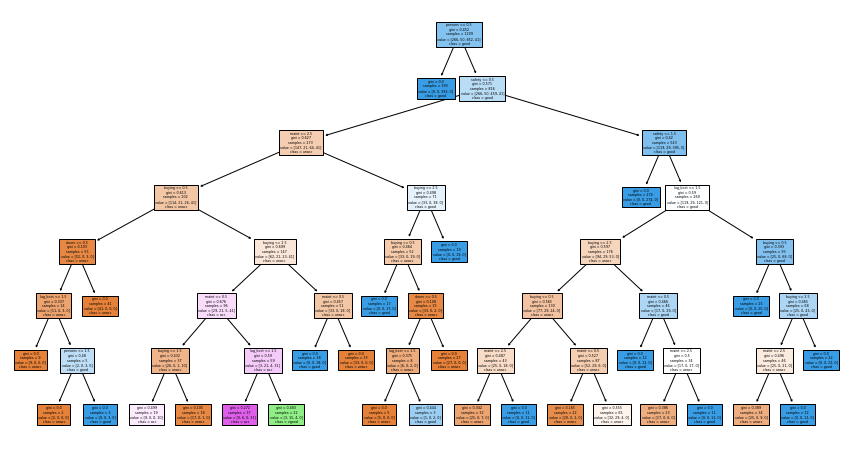

In [22]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(dtc,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [23]:
#Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X_train,y_train,cv=10,scoring='accuracy')
score.mean()

0.920564738292011

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X_test,y_test,cv=10,scoring='accuracy')
score.mean()

0.8959653092006032

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [29]:
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[109   4   1   4]
 [ 10   6   0   3]
 [ 11   0 346   1]
 [  0   0   0  24]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.84      0.92      0.88       118
        good       0.60      0.32      0.41        19
       unacc       1.00      0.97      0.98       358
       vgood       0.75      1.00      0.86        24

    accuracy                           0.93       519
   macro avg       0.80      0.80      0.78       519
weighted avg       0.94      0.93      0.93       519

